**<h2>Initial EDA for Common Crane Dataset<h2>**

In [1]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\cleaned_data_common_crane.csv")
final_cleaned_df = pd.read_csv(file_path)

C:\Users\riyas\AppData\Local\Temp\ipykernel_66556\2959190964.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  final_cleaned_df.resample('Y', on='OBSERVATION DATE').size().plot(marker='o', linestyle='-')


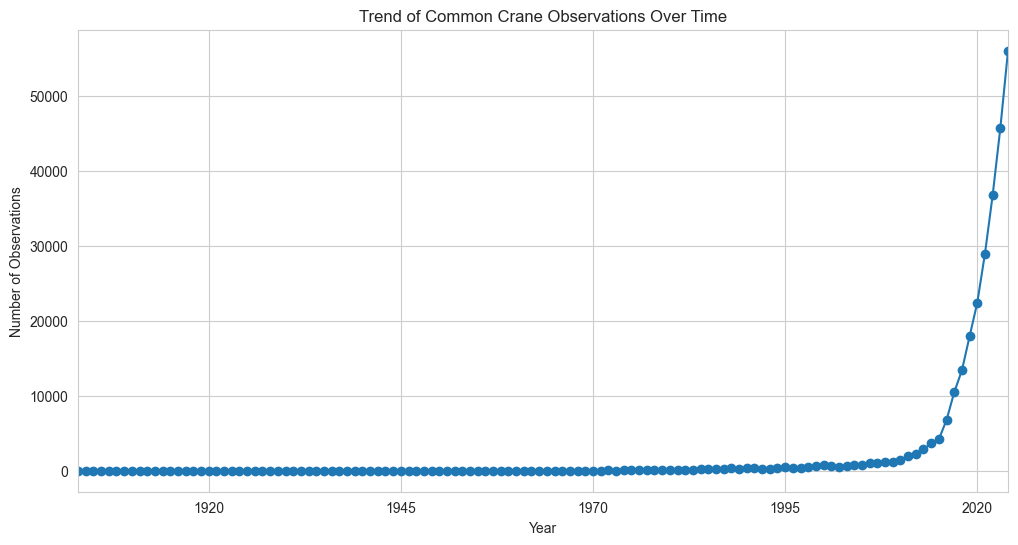

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'OBSERVATION DATE' to datetime for time-based analysis
final_cleaned_df['OBSERVATION DATE'] = pd.to_datetime(final_cleaned_df['OBSERVATION DATE'])

# Set plot style
sns.set_style("whitegrid")

# Plot 1: Number of Observations Over Time
plt.figure(figsize=(12, 6))
final_cleaned_df.resample('Y', on='OBSERVATION DATE').size().plot(marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Trend of Common Crane Observations Over Time")
plt.show()


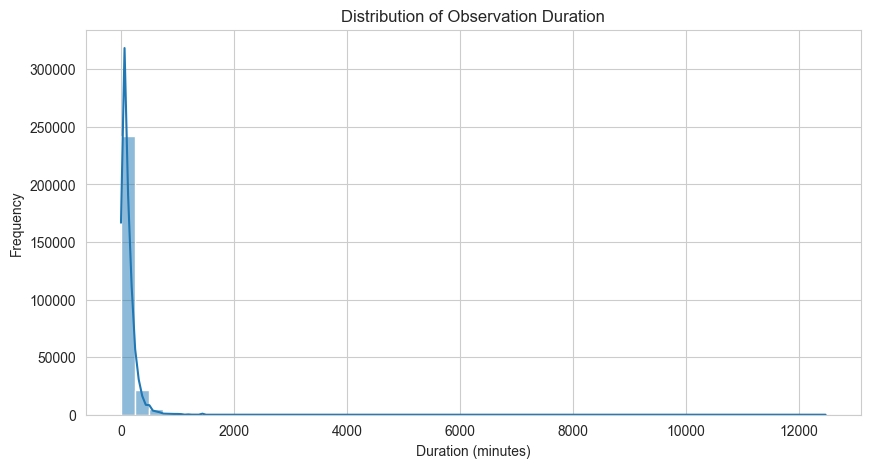

In [5]:
# Plot 2: Distribution of Observation Duration
plt.figure(figsize=(10, 5))
sns.histplot(final_cleaned_df['DURATION MINUTES'], bins=50, kde=True)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Observation Duration")
plt.show()

C:\Users\riyas\AppData\Local\Temp\ipykernel_66556\4253691416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


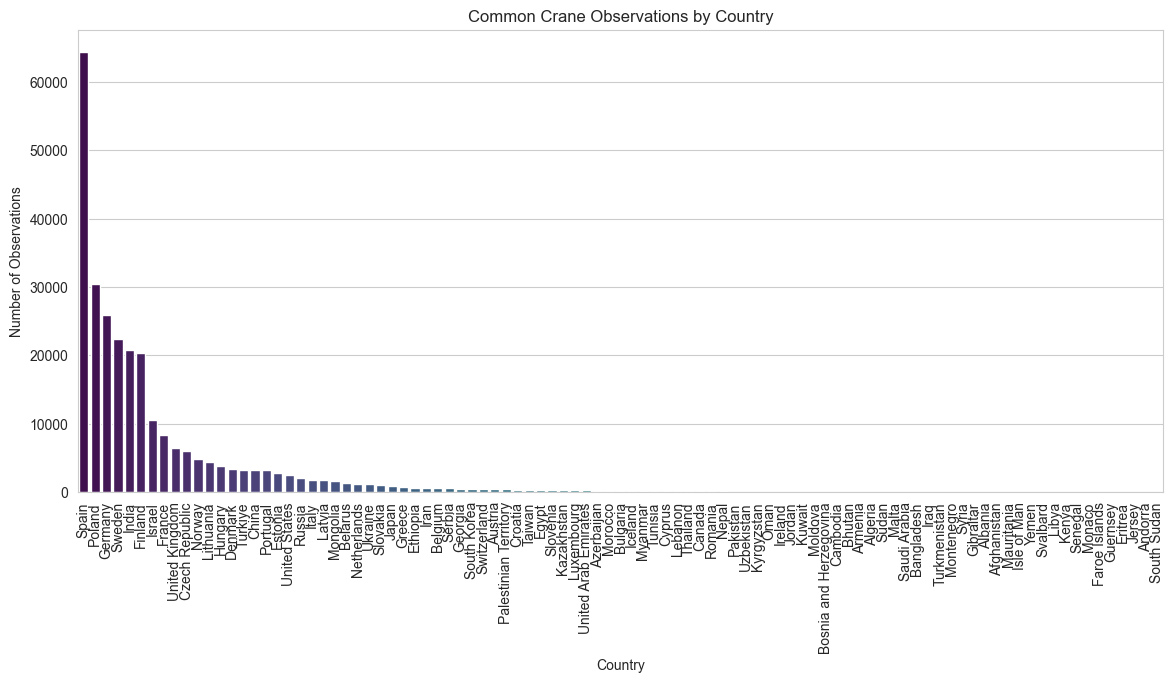

In [16]:
# Plot 3: Heatmap of Observations by Country

# Filter countries with at least one observation
country_counts = final_cleaned_df['COUNTRY'].value_counts()
country_counts = country_counts[country_counts > 0]  # Remove zero counts if any

plt.figure(figsize=(14, 6))
country_counts = final_cleaned_df['COUNTRY'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Observations")
plt.title("Common Crane Observations by Country")
plt.show()


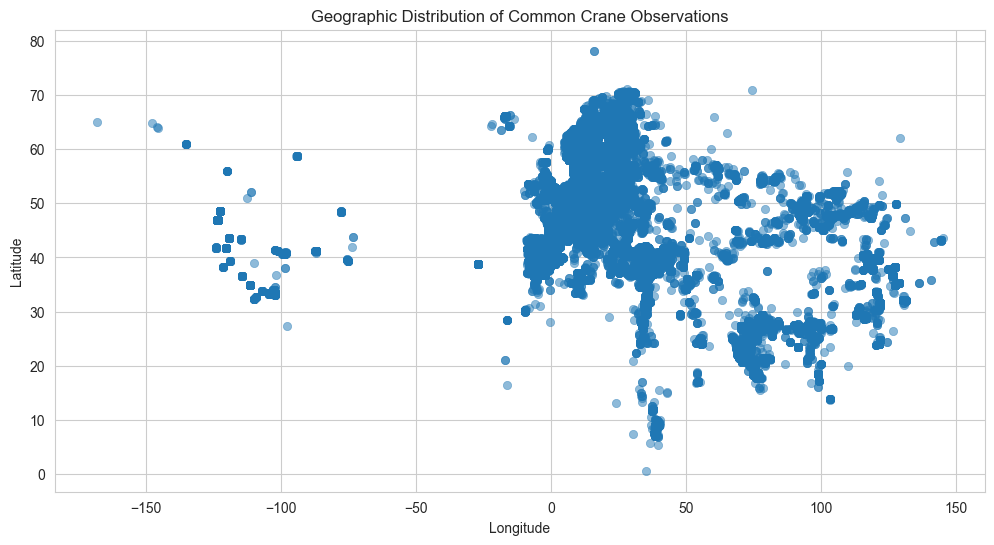

In [7]:
# Plot 4: Geographic Distribution of Observations (Latitude vs Longitude)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=final_cleaned_df['LONGITUDE'], y=final_cleaned_df['LATITUDE'], alpha=0.5, edgecolor=None)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Common Crane Observations")
plt.show()

**<h4> Key Insights So Far <h4>**

<h6>

Trend of Observations Over Time:
- The number of Common Crane observations fluctuates over the years, with certain peaks that may correlate with conservation efforts, migration patterns, or increased reporting.

Distribution of Observation Duration:
- Most observations are concentrated in shorter durations, with a skew towards lower values. This suggests that many observations are brief, possibly due to bird-watching practices.

Observations by Country:
- Some countries have significantly higher observation counts than others. This could indicate key migratory stopover locations or regions with more active birdwatchers.

Geographic Distribution of Observations:
- The scatter plot of latitude vs. longitude shows how observations are distributed spatially. This can be further refined to examine clusters of key migration hotspots.

<h6>

**<h3> Seasonal Analysis of Common Crane Observations <h3>**

C:\Users\riyas\AppData\Local\Temp\ipykernel_66556\1490996213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=final_cleaned_df['MONTH'], palette="coolwarm")


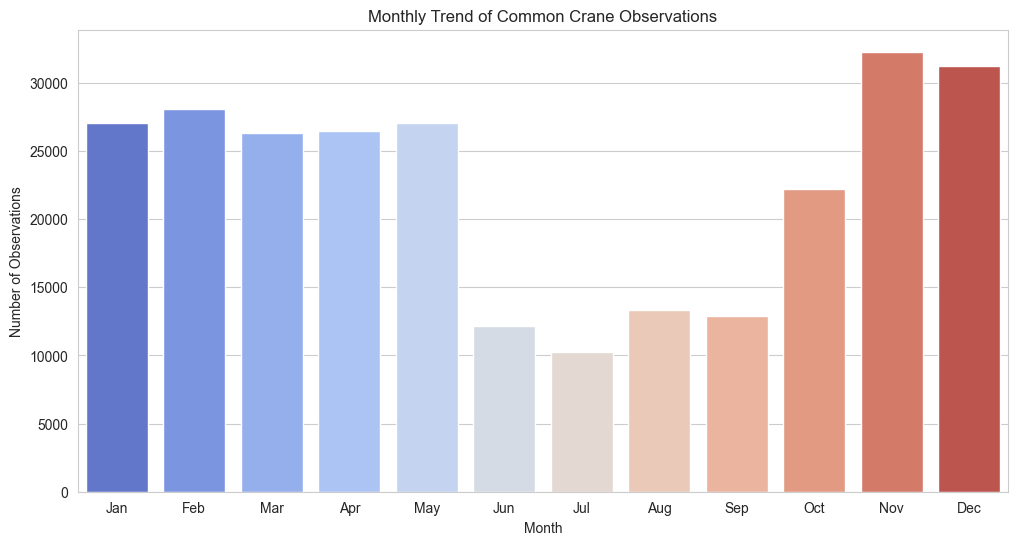

In [8]:
# Extract month and season from the observation date
final_cleaned_df['MONTH'] = final_cleaned_df['OBSERVATION DATE'].dt.month

# Define seasons (Northern Hemisphere)
season_mapping = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
final_cleaned_df['SEASON'] = final_cleaned_df['MONTH'].map(season_mapping)

# Plot 1: Number of Observations by Month
plt.figure(figsize=(12, 6))
sns.countplot(x=final_cleaned_df['MONTH'], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Monthly Trend of Common Crane Observations")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


C:\Users\riyas\AppData\Local\Temp\ipykernel_66556\2960728438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=final_cleaned_df['SEASON'], order=["Winter", "Spring", "Summer", "Autumn"], palette="viridis")


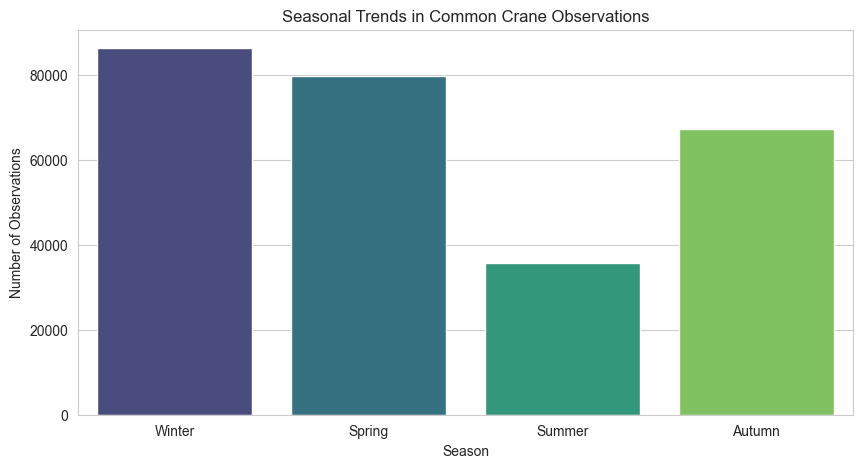

In [9]:
# Plot 2: Number of Observations by Season
plt.figure(figsize=(10, 5))
sns.countplot(x=final_cleaned_df['SEASON'], order=["Winter", "Spring", "Summer", "Autumn"], palette="viridis")
plt.xlabel("Season")
plt.ylabel("Number of Observations")
plt.title("Seasonal Trends in Common Crane Observations")
plt.show()

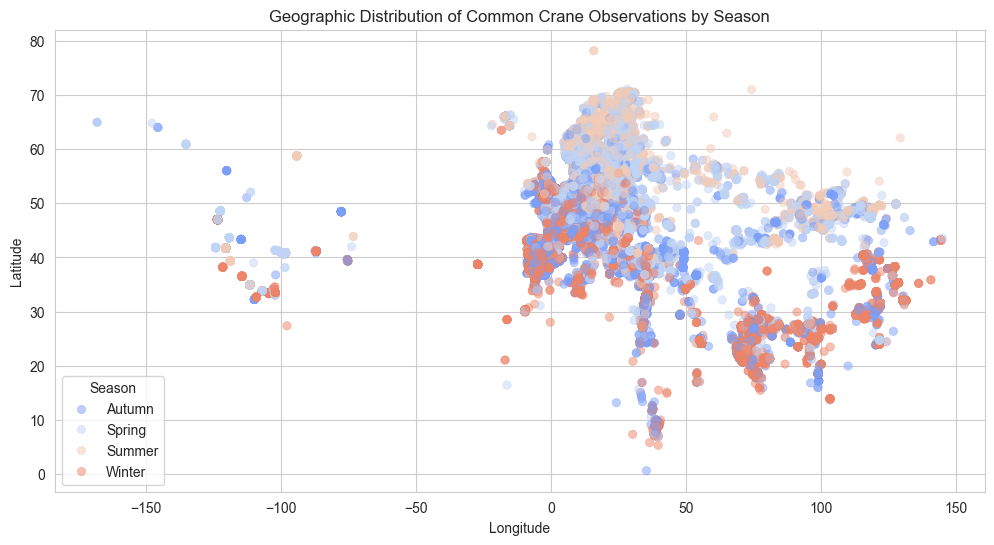

In [10]:
# Plot 3: Geographic Distribution by Season (Latitude vs Longitude Colored by Season)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=final_cleaned_df['LONGITUDE'], y=final_cleaned_df['LATITUDE'], hue=final_cleaned_df['SEASON'], alpha=0.5, edgecolor=None, palette="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Common Crane Observations by Season")
plt.legend(title="Season")
plt.show()

**<h4> Insights from Seasonal Migration Trends <h4>**

<h6>

Monthly Trends:
- Observation counts vary across months, with peaks that likely correspond to migration periods.
- This can help identify key months for migration activity.

Seasonal Trends:
- The number of observations varies by season, showing distinct migration cycles.
- If the autumn and spring seasons show peaks, this aligns with migration to and from breeding grounds.

Geographic Distribution by Season:
- The scatter plot indicates how observations shift spatially across seasons.
- This visualisation helps identify migration routes and key stopover locations.

<h6>

**<h3> Compare migration trends across different countries <h3>**

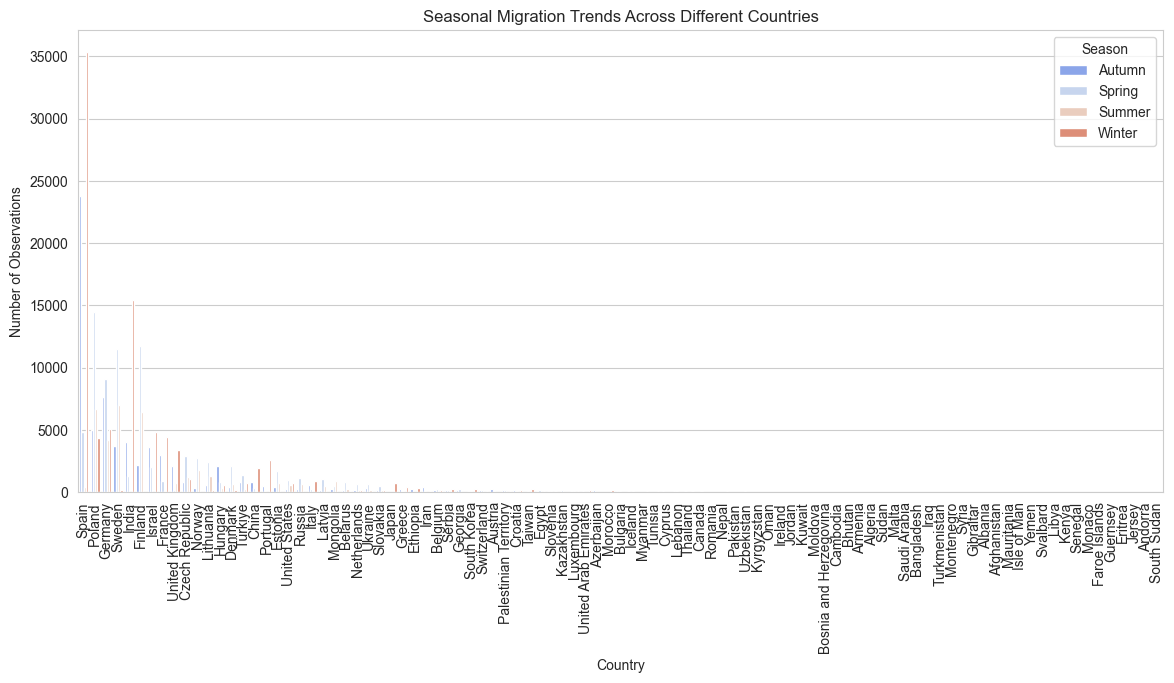

In [12]:
# Plot 1: Seasonal Observations by Country
plt.figure(figsize=(14, 6))
sns.countplot(x=final_cleaned_df['COUNTRY'], hue=final_cleaned_df['SEASON'], palette="coolwarm", order=final_cleaned_df['COUNTRY'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Observations")
plt.title("Seasonal Migration Trends Across Different Countries")
plt.legend(title="Season")
plt.show()


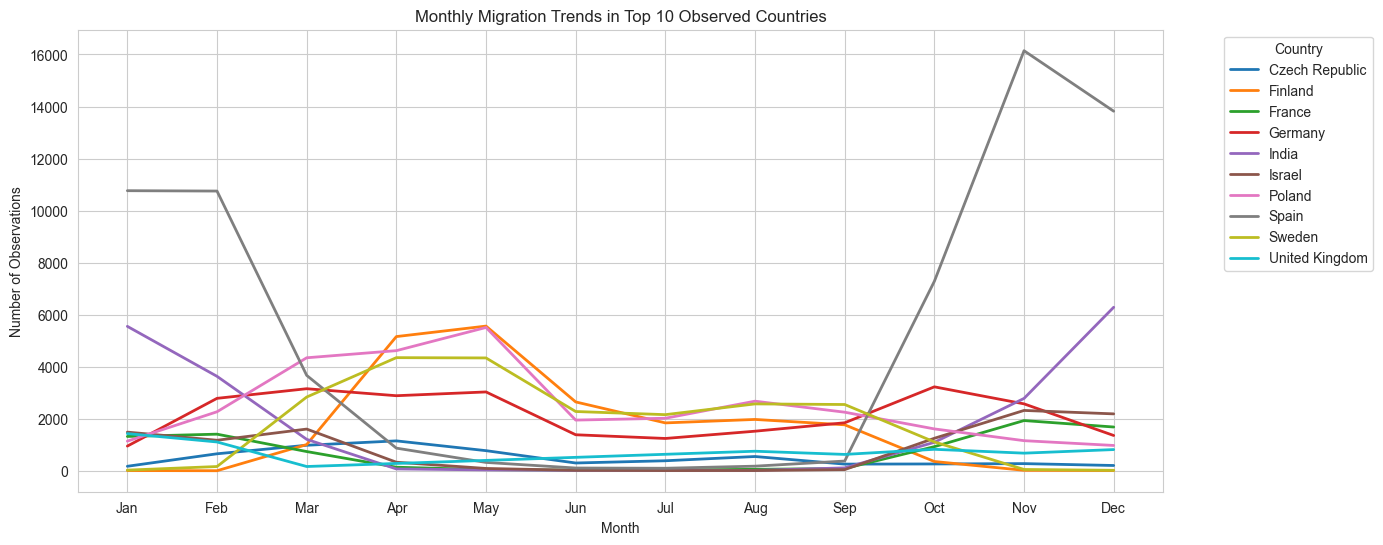

In [15]:
# Aggregate the count of observations per month for each country
monthly_trends = final_cleaned_df.groupby(['COUNTRY', 'MONTH']).size().reset_index(name='OBSERVATION COUNT')

# Plot 2: Monthly Observations by Country (Top 10 Countries)
top_countries = final_cleaned_df['COUNTRY'].value_counts().index[:10]
filtered_df = final_cleaned_df[final_cleaned_df['COUNTRY'].isin(top_countries)]

# Filter for top 10 observed countries
filtered_trends = monthly_trends[monthly_trends['COUNTRY'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_trends, x="MONTH", y="OBSERVATION COUNT", hue="COUNTRY", palette="tab10", lw=2)
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Monthly Migration Trends in Top 10 Observed Countries")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**<h4> Insights from Migration Trends Across Countries <h4>**

<h6>

Seasonal Observations by Country:
- The first plot shows that different countries have varying observation patterns across seasons.
- Some countries have significantly more observations during specific migration periods, indicating major stopover points.

Monthly Migration Trends in Top 10 Observed Countries:
- The second (fixed) plot highlights monthly variations in observations across the most frequently observed countries.
- Peaks in observations align with seasonal migration patterns, where birds move between breeding and wintering grounds.

<h6>